In [1]:
import numpy as np
from sklearn.datasets import load_files

reviews_train = load_files('aclImdb_v1/aclImdb/train')
text_train, y_train = reviews_train.data, reviews_train.target

In [2]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [3]:
reviews_test = load_files('aclImdb_v1/aclImdb/test')
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, max_df=.15)
X = vect.fit_transform(text_train)

In [5]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=42)
document_topics = lda.fit_transform(X)


In [6]:
lda.components_.shape

(10, 1000)

In [7]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())


In [8]:
import mglearn

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5,
                           n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
book          action        funny         worst         didn          
music         original      comedy        nothing       10            
version       fight         sex           script        saw           
work          new           pretty        actors        thought       
read          hero          re            awful         kids          
beautiful     lee           women         waste         now           
wonderful     john          laugh         money         got           
actors        western       fun           terrible      am            
dvd           star          lot           didn          watched       
excellent     city          humor         want          old           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
hous

In [9]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=42)
document_topics100 = lda100.fit_transform(X)

In [10]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
between       funny         hollywood     version       things        david         hard          
relationship  comedy        three         english       point         script        find          
young         jokes         perfect       language      prison        writing       ll            
wife          laugh         cast          cut           crew          direction     doesn         
both          hilarious     fantastic     dialogue      sometimes     directing     believe       
husband       laughs        wonderful     speak         break         work          take          
men           fun           oscar         although      come          director      anything      
married       joke          actors        though        problems      screen        seriously     
during    

In [12]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")
    

b"This film one would think was a woman's film but the rating say otherwise. The chemistry between the female and male lead was the only interesting part of this film.\n"
b'Pretty darn bad. Bad enough for some laughs.\n'
b"This movie comes on cable every once in a while, and I'm drawn to it like a moth to a flame. I know it's bad for me, and I still can't stop.\n"
b'I have to say, I just saw this movie for the first time last night, and I think it portrayed the Cayman Islands as some drug infested little island. I am a descendant of the island and I am appalled to see that is how the island is being represented.\n'
b'Although this movie undoubtedly is not of any great quality it has stuck with me more than most movies. In the fifteen years since I saw it I have retained not only the broad plot, but some incidentals as well.\n'
b'This movie is being shown over and over on cable lately, so..\n'
b'Only seen season 1 so far but this is just great!! A wide variety of people stuck on a islan

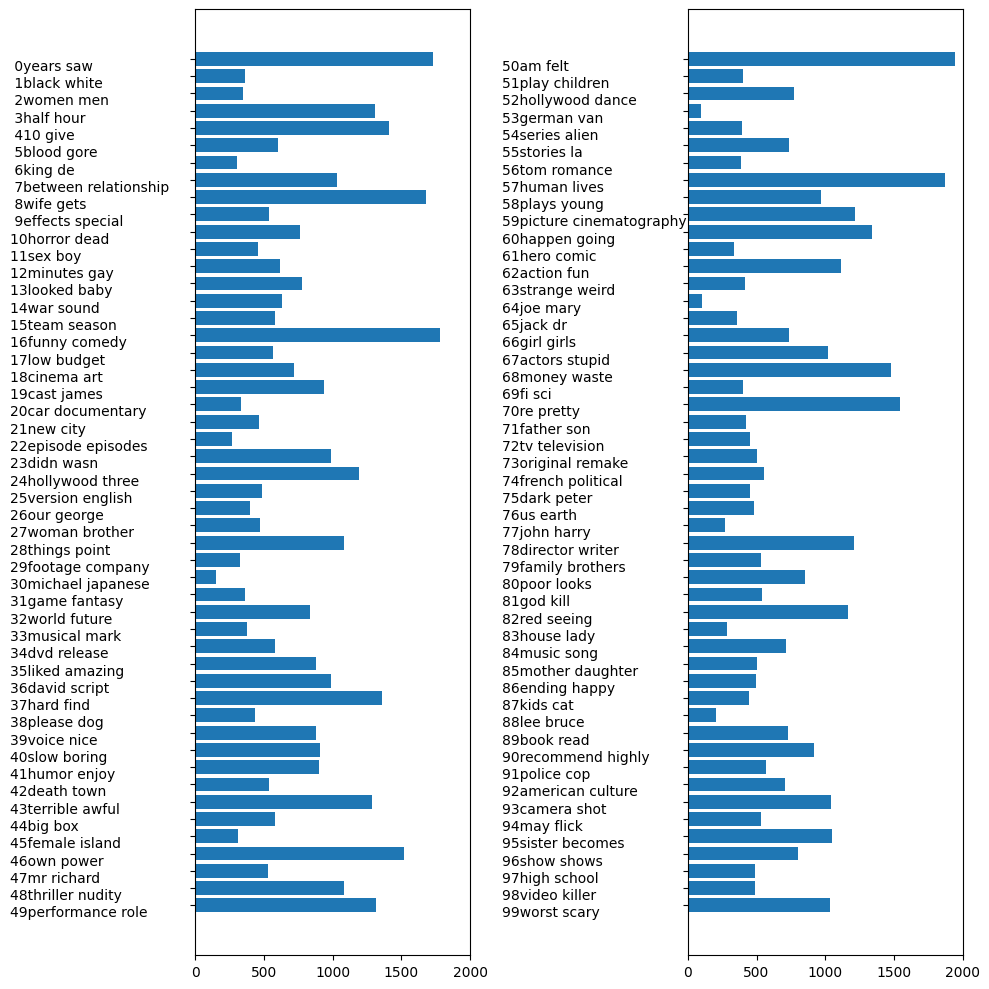

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()